## Loan Prediction Using Machine Learning

This project focuses on loan prediction using machine learning algorithms to help banks identify eligible applicants. By automating the loan approval process, the system reduces manual errors and shortens the time it takes to approve loans, benefiting both banks and applicants. The aim is to predict whether a customer’s loan will be approved based on features of the data. This supervised classification problem will be addressed using algorithms like:

- Decision Trees
- Logistic Regression
- Random Forest


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv file
loan_data=pd.read_csv(r"C:\Users\varun\OneDrive\Desktop\Aditit_Projects\loan_prediction.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Summary of the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# General Descriptive Statistics of the dataset
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Checking for null values
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## FIlling Missing Values

In [6]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0],inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0],inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0],inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0],inplace=True)
loan_data['ApplicantIncome'].fillna(loan_data['ApplicantIncome'].median(),inplace=True)
loan_data['CoapplicantIncome'].fillna(loan_data['CoapplicantIncome'].median(),inplace=True)
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(),inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median(),inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0],inplace=True)

In [7]:
loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
# Checking for duplicates
loan_data.duplicated().sum()

0

In [9]:
loan_data.drop('Loan_ID',axis=1,inplace=True)

In [10]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<Axes: xlabel='LoanAmount', ylabel='Count'>

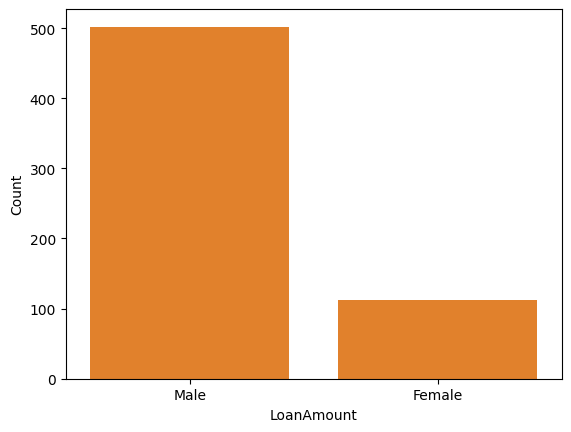

In [11]:
sns.histplot(loan_data['LoanAmount'])
sns.countplot(x='Gender', data=loan_data)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

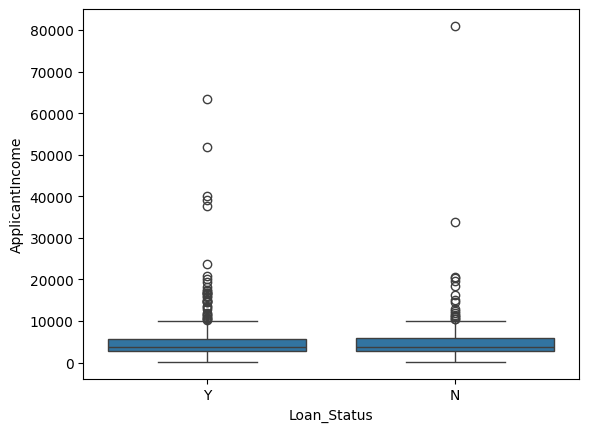

In [12]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_data)

<Axes: xlabel='Loan_Status', ylabel='count'>

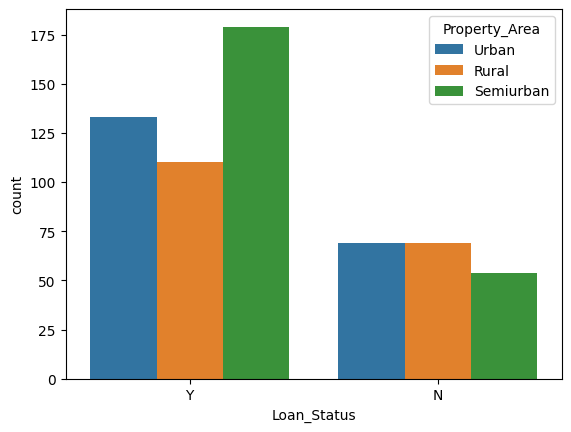

In [13]:
sns.countplot(x='Loan_Status', hue='Property_Area', data=loan_data)

## Feature Engineering

In [14]:
# Combining Applicant and Coapplicant Income
loan_data['Total_Income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']
loan_data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


<Figure size 1000x600 with 0 Axes>

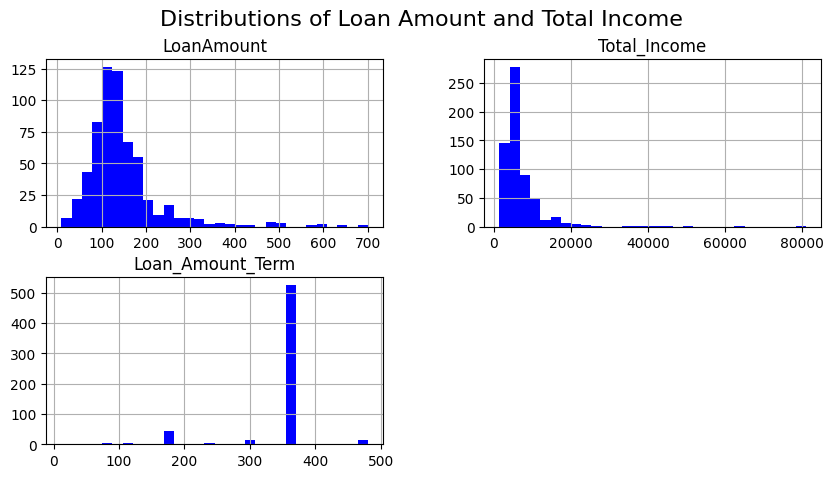

In [15]:
# Plotting the distribution of numerical features
plt.figure(figsize=(10, 6))
loan_data[['LoanAmount', 'Total_Income','Loan_Amount_Term']].hist(bins=30, figsize=(10, 5), color='blue')
plt.suptitle('Distributions of Loan Amount and Total Income', fontsize=16)
plt.show()

<Figure size 1000x600 with 0 Axes>

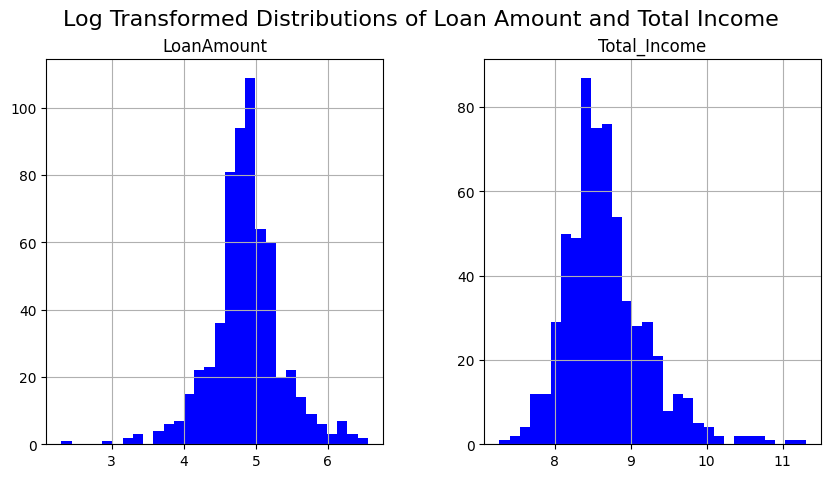

In [16]:
# Applying log transformation to reduce skewness
loan_data['LoanAmount'] = np.log1p(loan_data['LoanAmount'])  # np.log1p is used to avoid log(0) errors
loan_data['Total_Income'] = np.log1p(loan_data['Total_Income'])

# Plot the transformed distributions
plt.figure(figsize=(10, 6))
loan_data[['LoanAmount', 'Total_Income']].hist(bins=30, figsize=(10, 5), color='blue')
plt.suptitle('Log Transformed Distributions of Loan Amount and Total Income', fontsize=16)
plt.show()

In [17]:
loan_data.drop(['Self_Employed','Gender'],axis=1,inplace=True)
loan_data.head()

,Married,Dependents,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,No,0,Graduate,4.859812,360.0,1.0,Urban,Y,8.674197
1,Yes,1,Graduate,4.859812,360.0,1.0,Rural,N,8.714732
2,Yes,0,Graduate,4.204693,360.0,1.0,Urban,Y,8.006701
3,Yes,0,Not Graduate,4.795791,360.0,1.0,Urban,Y,8.505525
4,No,0,Graduate,4.955827,360.0,1.0,Urban,Y,8.699681


In [18]:
# Selecting the categorical data types
cat_var=loan_data.select_dtypes(include='object').columns

In [19]:
# Encoding the categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
for i in cat_var:
    loan_data[i]=encoder.fit_transform(loan_data[i])


In [20]:
# Standardizing the numerical variables using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
loan_data[['LoanAmount','Loan_Amount_Term','Total_Income']]=scaler.fit_transform(loan_data[['LoanAmount','Loan_Amount_Term','Total_Income']])
loan_data.head()

,Married,Dependents,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,0,-0.012803,0.273231,1.0,2,1,0.008426
1,1,1,0,-0.012803,0.273231,1.0,0,0,0.082860
2,1,0,0,-1.348663,0.273231,1.0,2,1,-1.217299
3,1,0,1,-0.143351,0.273231,1.0,2,1,-0.301306
4,0,0,0,0.182981,0.273231,1.0,2,1,0.055223


<Axes: >

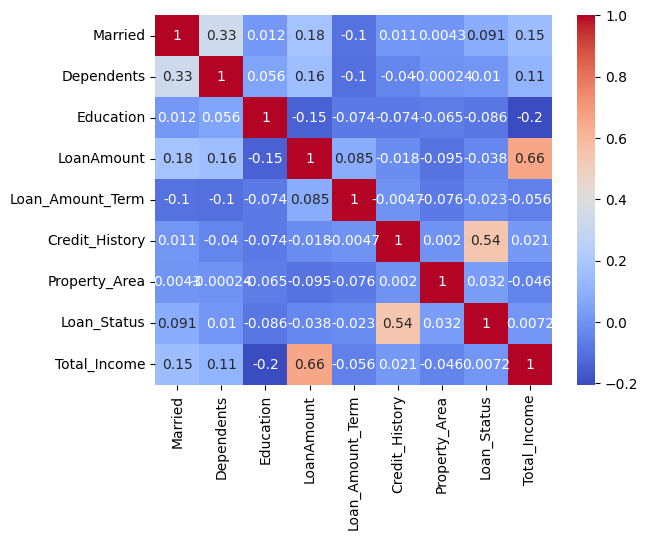

In [21]:
# Checking the correlation between variables
correlation_matrix=loan_data.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')

## Model Building 

In [22]:
X=loan_data.drop(['Loan_Status'],axis=1)
y=loan_data['Loan_Status']

In [23]:
# Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score,classification_report
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred=dec_tree.predict(X_test)

In [26]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1])

In [27]:
accuracy_score(y_test,y_pred)

0.6702702702702703

In [28]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'max_depth': [None, 10, 20, 30, 40,50],
    'min_samples_split': [2, 10, 20, 30,40],
    'min_samples_leaf': [1, 2, 5, 10,13,15],
    'criterion': ['gini', 'entropy','log_loss'],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']}
random_search = RandomizedSearchCV(
    dec_tree, 
    param_distributions=param_dist, 
    n_iter=200,  # Number of random parameter combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=1,  # To print progress
    random_state=42, 
    n_jobs=-1  # Use all available cores
)

In [29]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10, 13,
                                                             15],
                                        'min_samples_split': [2, 10, 20, 30,
                                                              40],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=1)

In [30]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=10, max_features='log2',
                       min_samples_leaf=15, min_samples_split=40,
                       random_state=42, splitter='random')

In [31]:
model=random_search.best_estimator_
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1])

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185



In [33]:
print(f'accuracy: {accuracy_score(y_test,y_pred)}')
print(f'precision: {precision_score(y_test,y_pred)}')
print(f'recall: {recall_score(y_test,y_pred).round(2)}')

accuracy: 0.8486486486486486
precision: 0.8278145695364238
recall: 0.98


## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rand_clf=RandomForestClassifier()
rand_clf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred=rand_clf.predict(X_test)

In [36]:
print(f'accuracy: {accuracy_score(y_test,y_pred)}')
print(f'precision: {precision_score(y_test,y_pred)}')
print(f'recall: {recall_score(y_test,y_pred)}')

accuracy: 0.7945945945945946
precision: 0.8296296296296296
recall: 0.8818897637795275


In [37]:
param = {
    'n_estimators': np.arange(50, 500, 50),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'bootstrap': [True, False]
}
rand_search=RandomizedSearchCV(rand_clf,param,n_iter=200,cv=5,random_state=42,scoring='accuracy',n_jobs=-1,verbose=1)

In [38]:
rand_search.fit(X_train,y_train)
rand_search.best_estimator_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=450)

In [39]:
best_rf=rand_search.best_estimator_
y_pred=best_rf.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.60      0.69        58
           1       0.84      0.93      0.88       127

    accuracy                           0.83       185
   macro avg       0.82      0.77      0.78       185
weighted avg       0.82      0.83      0.82       185



In [41]:
print(f'accuracy: {accuracy_score(y_test,y_pred)}')
print(f'precision: {precision_score(y_test,y_pred)}')
print(f'recall: {recall_score(y_test,y_pred)}')

accuracy: 0.827027027027027
precision: 0.8368794326241135
recall: 0.9291338582677166


## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(random_state=42)
logistic.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [43]:
y_pred=logistic.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1])

In [44]:
accuracy_score(y_test,y_pred)

0.8486486486486486

In [45]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 10, 100, 1000],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced'],
    'l1_ratio': np.linspace(0, 1, 5)  # Only used with 'elasticnet'
}
random_search= RandomizedSearchCV(
    logistic, 
    param_grid, 
    n_iter=300,  # Number of random parameter combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=1,  # To print progress
    random_state=42, 
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
445 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 0.2, 0.5, 1, 2,
                                              10, 100, 1000],
                                        'class_weight': [None, 'balanced'],
                                        'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['liblinear', 'saga',
                                                   'lbfgs']},
                   random_state=42, verbose=1)

In [46]:
model=random_search.best_estimator_
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1])

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185



In [48]:
print(f'accuracy: {accuracy_score(y_test,y_pred)}')
print(f'precision: {precision_score(y_test,y_pred)}')
print(f'recall: {recall_score(y_test,y_pred)}')

accuracy: 0.8486486486486486
precision: 0.8278145695364238
recall: 0.984251968503937
